In [1]:
from matplotlib import pyplot as plt
import h5py
import numpy as np
import matplotlib.gridspec as gridspec
import random
from astroML.correlation import two_point
from scipy.optimize import curve_fit
import os
import subprocess

# Compute the galaxy positions at fixed abundance
### For z = 0.20, 0.50, 1.00, and 2.00 at n =  $\sim$0.33, $\sim$0.14, and 0.03 Galaxy/Mpc$^3$, including red and blue galaxies

In [2]:
# iterate through each redshift
for z in [0.20,0.50,1.00,2.00]:
    
    z="{:.2f}".format(z) 
    cdm_galaxy = h5py.File('Data/n/home07/sbose/COLOR_CDM_Galaxies_z'+z+'.hdf5', 'r')
    wdm_galaxy = h5py.File('Data/n/home07/sbose/COLOR_WDM_Galaxies_z'+z+'.hdf5', 'r')
    
    # Access color/position/mass for wdm/cdm
    cdm_galaxy_color = cdm_galaxy['Colour'][:]
    cdm_galaxy_position = cdm_galaxy['GalaxyPos'][:]
    cdm_galaxy_mass = cdm_galaxy['StellarMass'][:]

    wdm_galaxy_color = wdm_galaxy['Colour'][:]
    wdm_galaxy_position = wdm_galaxy['GalaxyPos'][:]
    wdm_galaxy_mass = wdm_galaxy['StellarMass'][:]
    
    # sort in order of descending mass
    cdm_ind = sorted(range(len(cdm_galaxy_mass)), key=lambda k: cdm_galaxy_mass[k], reverse = True)
    wdm_ind = sorted(range(len(wdm_galaxy_mass)), key=lambda k: wdm_galaxy_mass[k], reverse = True)

    # define the red and blue galaxies for CDM
    cdm_blue = np.array(cdm_galaxy_color)[np.where(cdm_galaxy_color < 0.5)]
    cdm_red = np.array(cdm_galaxy_color)[np.where(cdm_galaxy_color > 0.5)]

    # define the red and blue galaxies for WDM
    wdm_blue = np.array(wdm_galaxy_color)[np.where(wdm_galaxy_color < 0.5)]
    wdm_red = np.array(wdm_galaxy_color)[np.where(wdm_galaxy_color > 0.5)]
    
    # sort the blue galaxies in order of descending mass
    cdm_blue_ind = sorted(range(len(cdm_blue)), key=lambda k: cdm_galaxy_mass[k], reverse = True)
    wdm_blue_ind = sorted(range(len(wdm_blue)), key=lambda k: wdm_galaxy_mass[k], reverse = True)

    # sort the red galaxies in order of descending mass
    cdm_red_ind = sorted(range(len(cdm_red)), key=lambda k: cdm_galaxy_mass[k], reverse = True)
    wdm_red_ind = sorted(range(len(wdm_red)), key=lambda k: wdm_galaxy_mass[k], reverse = True)

    # Create an input folder 
    home="C:\\Users\\shife\\OneDrive\\Harvard_Stuff\\Astro_98"
    folder=home+"\\Input\\redshift\\"
    if not os.path.exists(folder):
        os.mkdir(folder)
        
    # iterate through each galaxy number density
    for n in [326952,136834,30000]:

        # label the galaxy positions correctly
        label="_galaxy_position_z"+z+"_n{:.2f}".format(n/100**3)+".txt"
    
        # save the galaxy positions
        np.savetxt(folder+"cdm"+label, cdm_galaxy_position[cdm_ind[:n]], fmt = "%f %f %f")
        np.savetxt(folder+"wdm"+label, wdm_galaxy_position[wdm_ind[:n]], fmt = "%f %f %f")

        # save the blue galaxy positions
        np.savetxt(folder+"cdm_blue"+label, cdm_galaxy_position[cdm_blue_ind[:n]], fmt = "%f %f %f")
        np.savetxt(folder+"wdm_blue"+label, wdm_galaxy_position[wdm_blue_ind[:n]], fmt = "%f %f %f")

        # save the red galaxy positions
        np.savetxt(folder+"cdm_red"+label, cdm_galaxy_position[cdm_red_ind[:n]], fmt = "%f %f %f")
        np.savetxt(folder+"wdm_red"+label, wdm_galaxy_position[wdm_red_ind[:n]], fmt = "%f %f %f")
        
# Zip each input file
os.chdir(folder)
for file in os.listdir(folder):
    if file.endswith('.txt'):
        subprocess.call(['zip','-ur','redshift.zip',file])
os.chdir(home)

# Plot the Correlation Function
### Import the output data from Odyssey

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in true_divide


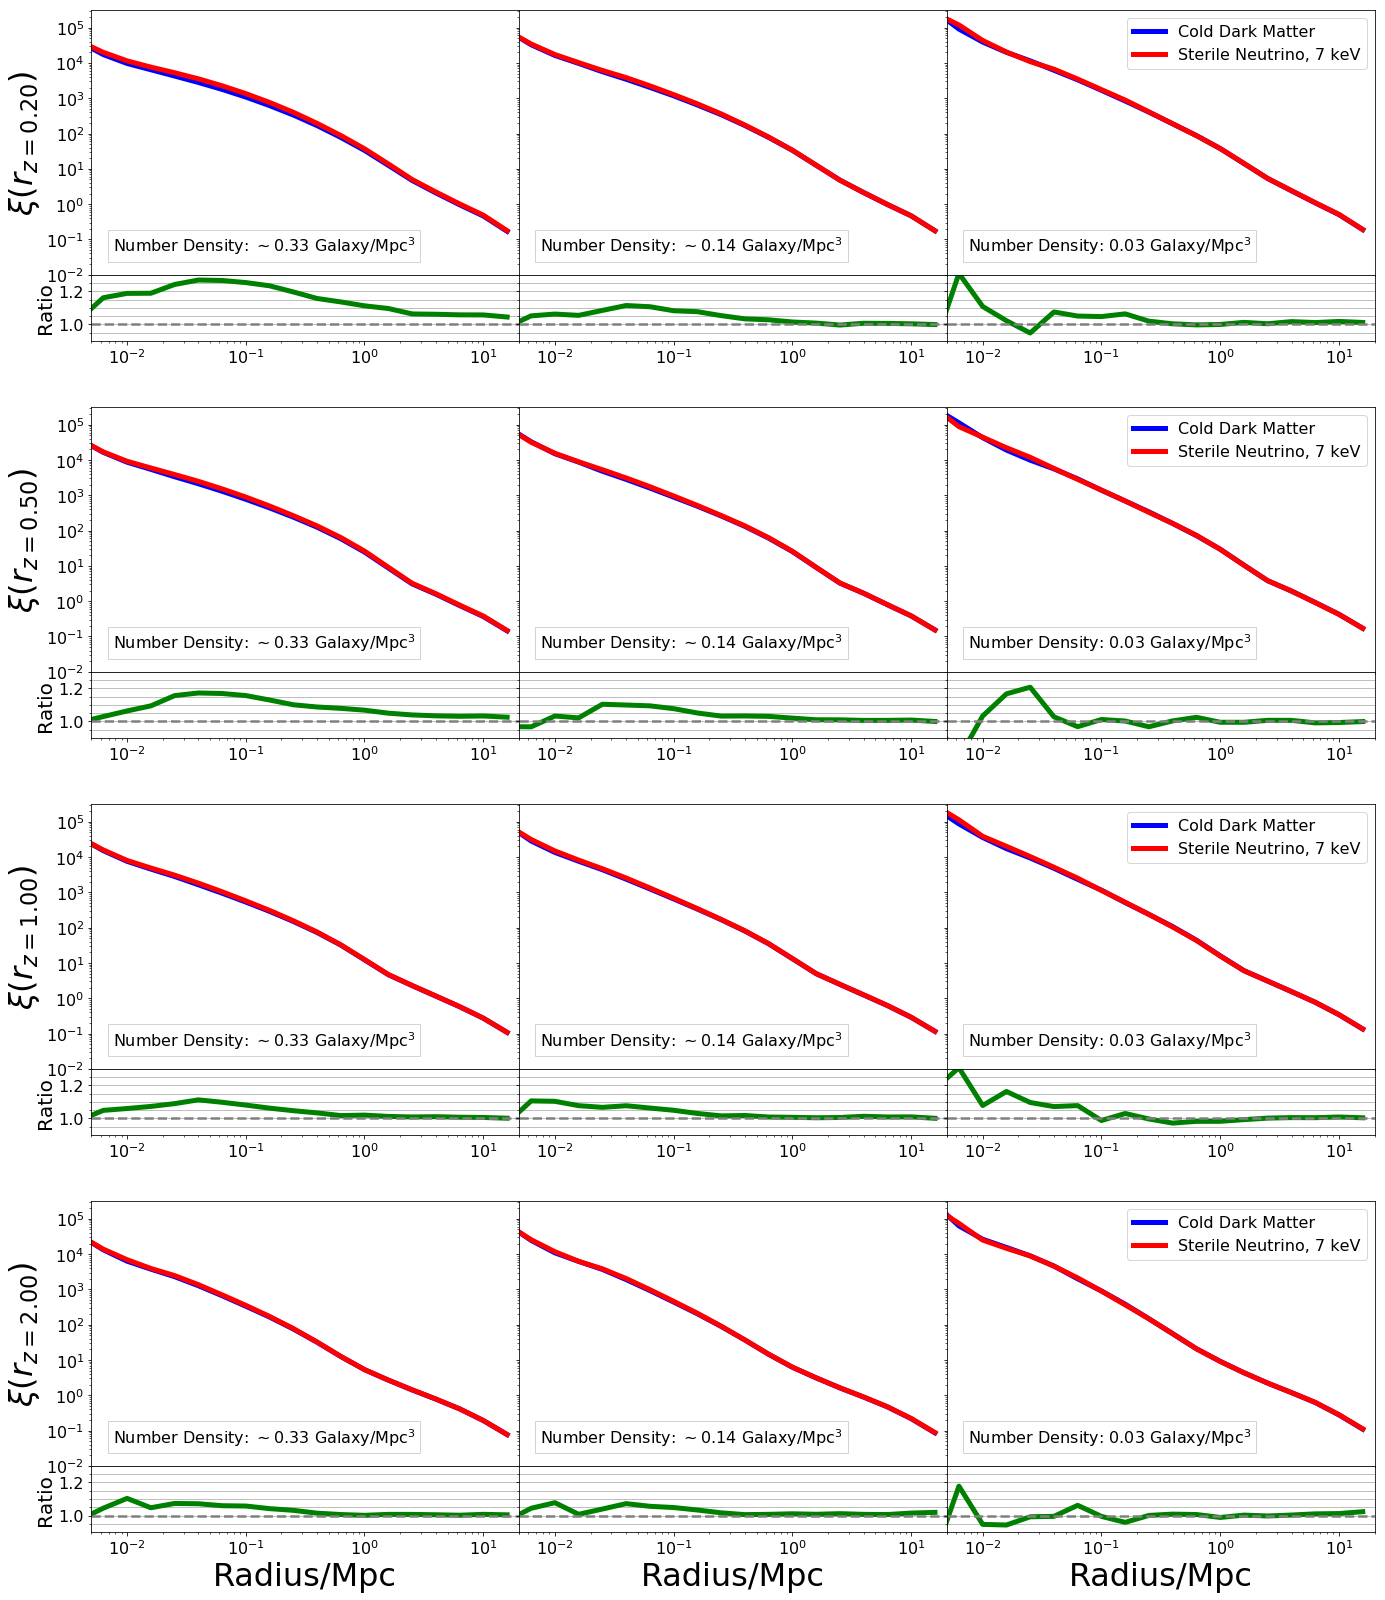

In [3]:
fig = plt.figure(figsize = (23,28)) # 30,32 #21,30 #23,28
gs = gridspec.GridSpec(4, 1)

i=0
for z in [0.2,0.5,1.00,2.00]:
    
    z="{:.2f}".format(z)
        
    # load data
    CUTE_cdm_n1 = np.genfromtxt("Output/redshift/corr_cdm_galaxy_position_z"+z+"_n0.33.txt")
    CUTE_wdm_n1 = np.genfromtxt("Output/redshift/corr_wdm_galaxy_position_z"+z+"_n0.33.txt")

    CUTE_cdm_n2 = np.genfromtxt("Output/redshift/corr_cdm_galaxy_position_z"+z+"_n0.14.txt")
    CUTE_wdm_n2 = np.genfromtxt("Output/redshift/corr_wdm_galaxy_position_z"+z+"_n0.14.txt")

    CUTE_cdm_n3 = np.genfromtxt("Output/redshift/corr_cdm_galaxy_position_z"+z+"_n0.03.txt")
    CUTE_wdm_n3 = np.genfromtxt("Output/redshift/corr_wdm_galaxy_position_z"+z+"_n0.03.txt")

    grid = gridspec.GridSpecFromSubplotSpec(2, 3, subplot_spec = gs[i], hspace = 0, wspace = 0, 
                                            height_ratios=[4,1])

    # first grid
    grid0 = fig.add_subplot(grid[0])
    grid0.loglog(CUTE_cdm_n1[:,0], CUTE_cdm_n1[:,1], linewidth = 5, color = "blue")
    grid0.loglog(CUTE_wdm_n1[:,0], CUTE_wdm_n1[:,1], linewidth = 5, color = "red")
    grid0.set_ylabel(r"$\xi(r_{z="+z+"})$", fontsize = 32)

    # second grid
    grid1 = fig.add_subplot(grid[1])
    grid1.loglog(CUTE_cdm_n2[:,0], CUTE_cdm_n2[:,1], linewidth = 5, color = "blue")
    grid1.loglog(CUTE_wdm_n2[:,0], CUTE_wdm_n2[:,1], linewidth = 5, color = "red")

    # third grid
    grid2 = fig.add_subplot(grid[2])
    grid2.loglog(CUTE_cdm_n3[:,0], CUTE_cdm_n3[:,1], label = "Cold Dark Matter", linewidth = 5, color = "blue")
    grid2.loglog(CUTE_wdm_n3[:,0], CUTE_wdm_n3[:,1], label = "Sterile Neutrino, 7 keV", linewidth = 5, 
                 color = "red")
    grid2.legend(fontsize = 16)
    
    # fourth grid
    grid3 = fig.add_subplot(grid[3], sharex=grid0)
    grid3.semilogx(CUTE_cdm_n1[:,0], CUTE_wdm_n1[:,1]/CUTE_cdm_n1[:,1], linewidth = 5, color = "green")
    grid3.set_ylabel("Ratio", fontsize = 20)

    # fifth grid
    grid4 = fig.add_subplot(grid[4])
    grid4.semilogx(CUTE_cdm_n2[:,0], CUTE_wdm_n2[:,1]/CUTE_cdm_n2[:,1], linewidth = 5, color = "green")
    
    # sixth grid
    grid5 = fig.add_subplot(grid[5])
    grid5.semilogx(CUTE_cdm_n3[:,0], CUTE_wdm_n3[:,1]/CUTE_cdm_n3[:,1], linewidth = 5, color = "green")

    # details
    for n,grid,offset in zip(['$\sim$0.33','$\sim$0.14','0.03'],[grid0,grid1,grid2],[0,1,2]):
        textstr = r'Number Density: '+n+' Galaxy/Mpc$^{3}$'
        props = dict(facecolor='none', edgecolor='lightgrey', pad = 5.0)
        grid.text(0.05+offset, 0.15, textstr, transform = grid0.transAxes, fontsize = 16, 
                   verticalalignment = 'top', bbox=props)
        grid.set_ylim(10**-2, 10**5.5)  
            
    for grid in [grid3,grid4,grid5]:
        grid.axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)
        grid.set_ylim(0.9, 1.3)
        grid.yaxis.grid(which = "both")
        
        if i==3:
            grid.set_xlabel("Radius/Mpc", fontsize = 32)

    for grid in [grid1,grid2,grid4,grid5]:
        grid.set_yticklabels([])
        
    for grid in [grid0,grid1,grid2,grid3,grid4,grid5]:
        grid.tick_params(labelsize=16)
        grid.set_xlim(5*10**-3, 2e1)
        grid.minorticks_on()   
        
    i+=1

plt.savefig('Images/Summer2020/Redshift.pdf')        
plt.show()

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in true_divide


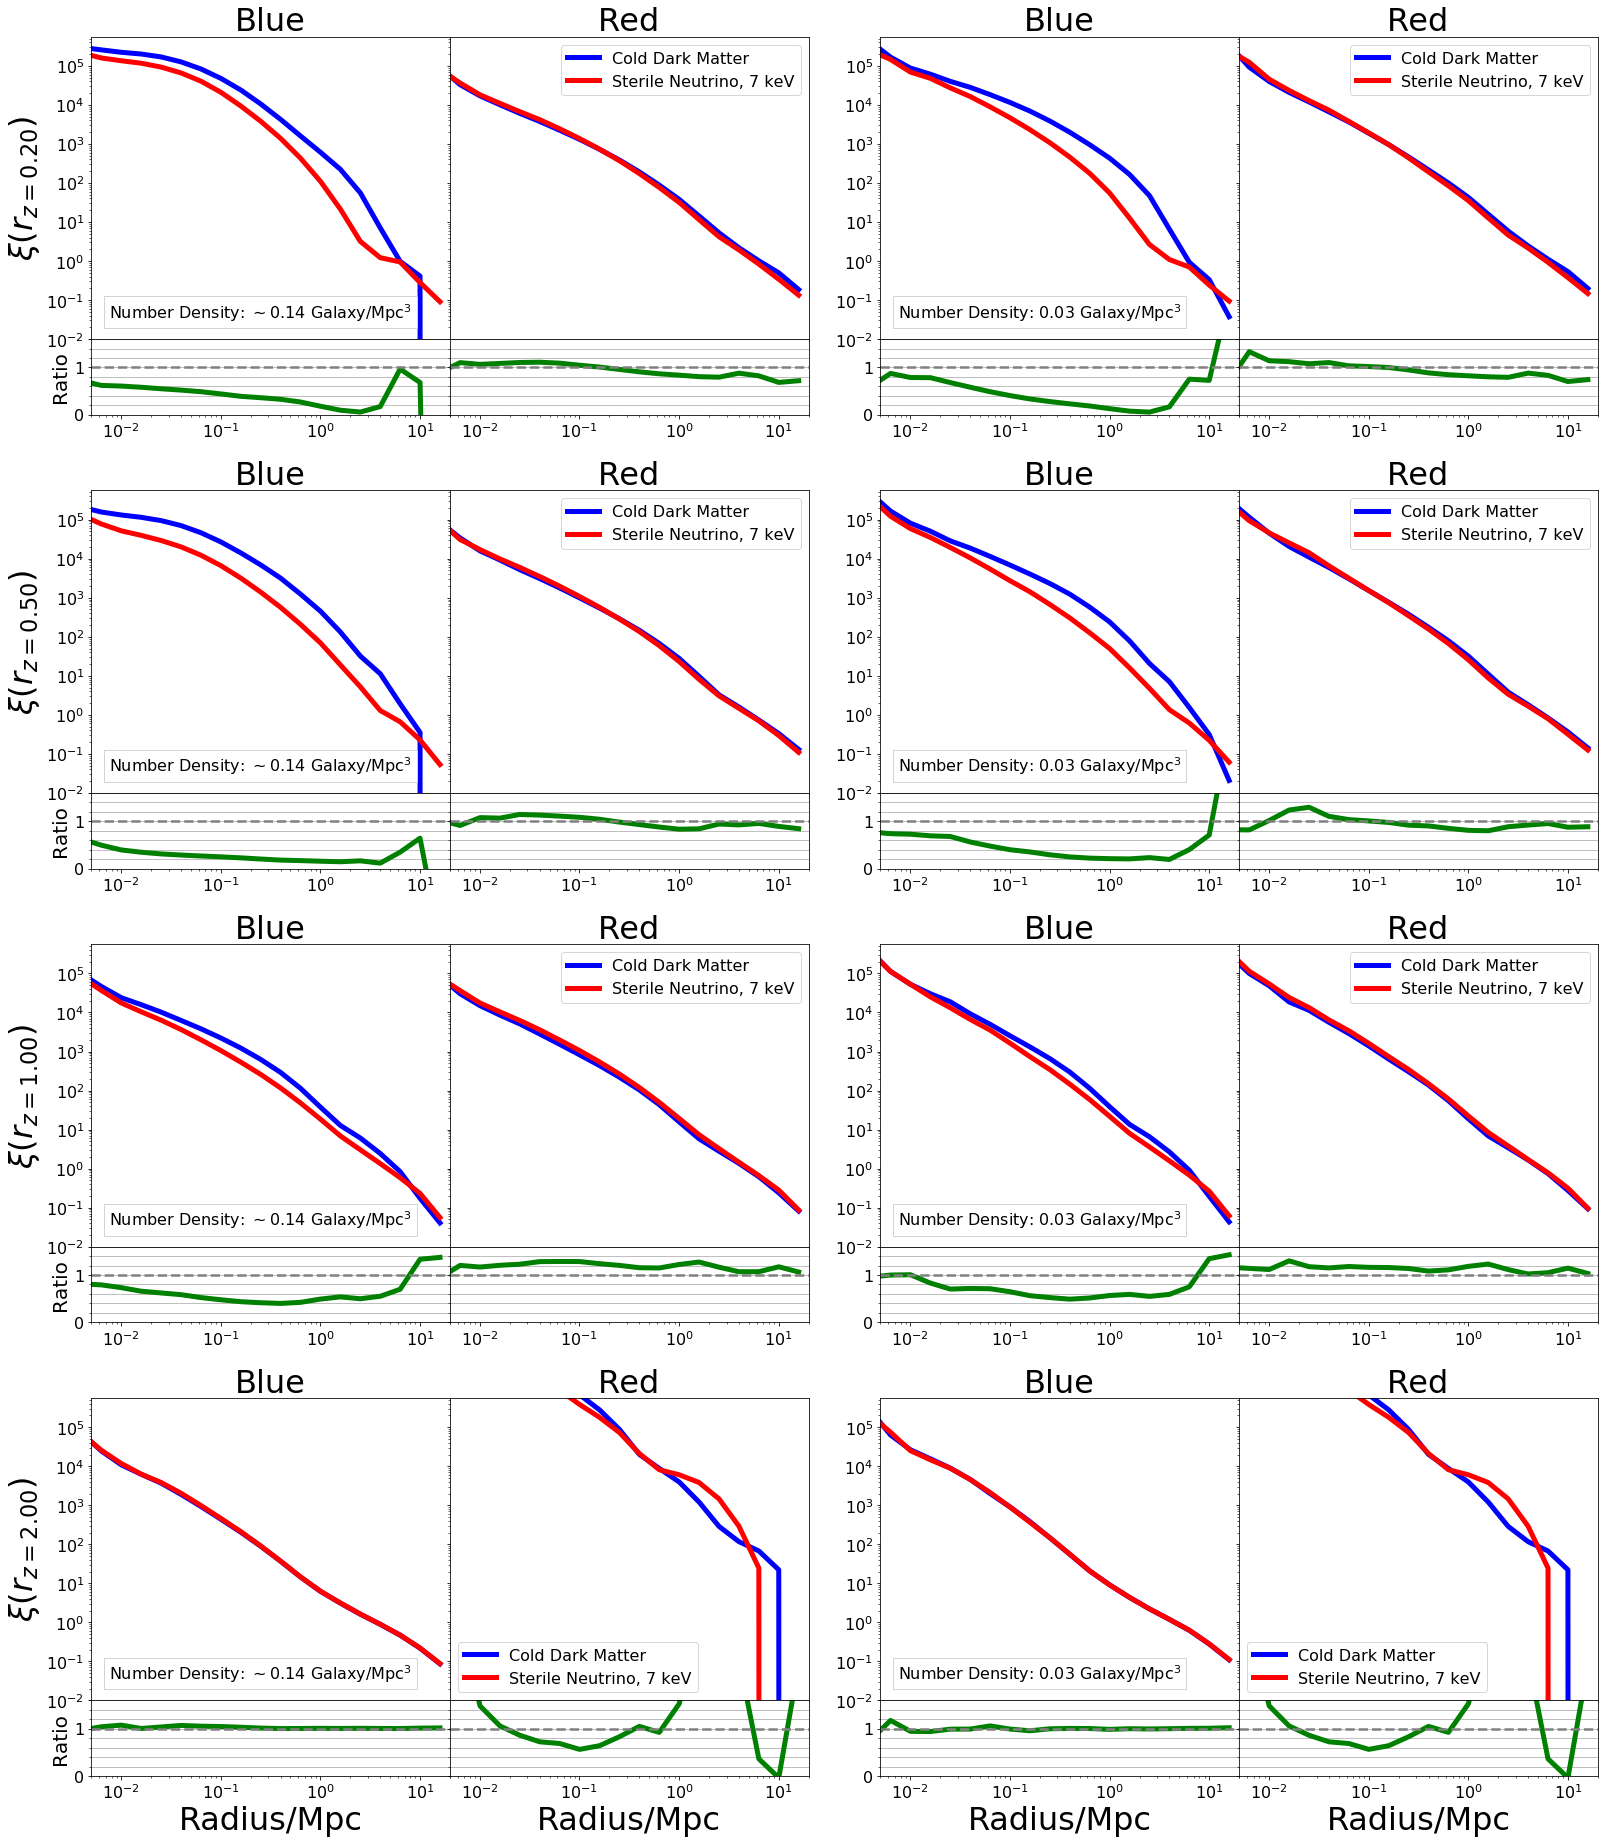

In [4]:
fig = plt.figure(figsize = (27, 32)) #28,40 #25,30
gs = gridspec.GridSpec(4, 2)

i=0
for z in [0.2,0.5,1.00,2.00]:
    
    z="{:.2f}".format(z)

    for n, n_text in zip([0.14,0.03],['$\sim$0.14','0.03']):
        
        n="{:.2f}".format(n)
        
        # load data
        CUTE_cdm_blue = np.genfromtxt("Output/redshift/corr_cdm_blue_galaxy_position_z"+z+"_n"+n+".txt")
        CUTE_wdm_blue = np.genfromtxt("Output/redshift/corr_wdm_blue_galaxy_position_z"+z+"_n"+n+".txt")
        
        CUTE_cdm_red = np.genfromtxt("Output/redshift/corr_cdm_red_galaxy_position_z"+z+"_n"+n+".txt")
        CUTE_wdm_red = np.genfromtxt("Output/redshift/corr_wdm_red_galaxy_position_z"+z+"_n"+n+".txt")
        
        textstr = r'Number Density: '+n_text+' Galaxy/Mpc$^{3}$'
        props = dict(facecolor='none', edgecolor='lightgrey', pad = 5.0)

        grid = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec = gs[i], hspace = 0, wspace = 0, 
                                                height_ratios=[4,1])
        
        # first grid
        grid0 = fig.add_subplot(grid[0])
        grid0.loglog(CUTE_cdm_blue[:,0], CUTE_cdm_blue[:,1], label = "Cold Dark Matter", linewidth = 5, 
                     color = "blue")
        grid0.loglog(CUTE_wdm_blue[:,0], CUTE_wdm_blue[:,1], label = "Sterile Neutrino, 7 keV", 
                     linewidth = 5, color = "red")
        grid0.text(0.05, 0.125, textstr, transform = grid0.transAxes, fontsize = 16, 
                   verticalalignment = 'top', bbox=props)
        grid0.set_title('Blue',fontsize=32)
        
        # second grid
        grid1 = fig.add_subplot(grid[1])
        grid1.loglog(CUTE_cdm_red[:,0], CUTE_cdm_red[:,1], label = "Cold Dark Matter", linewidth = 5, 
                     color = "blue")
        grid1.loglog(CUTE_wdm_red[:,0], CUTE_wdm_red[:,1], label = "Sterile Neutrino, 7 keV", 
                     linewidth = 5, color = "red")
        grid1.legend(fontsize = 16)
        grid1.set_title('Red',fontsize=32)

        # third grid
        grid2 = fig.add_subplot(grid[2], sharex=grid0)
        grid2.semilogx(CUTE_wdm_blue[:,0], CUTE_wdm_blue[:,1]/CUTE_cdm_blue[:,1], linewidth = 5, 
                       color = "green")
        
        # fourth grid
        grid3 = fig.add_subplot(grid[3])
        grid3.semilogx(CUTE_wdm_red[:,0], CUTE_wdm_red[:,1]/CUTE_cdm_red[:,1], linewidth = 5, 
                       color = "green")
        
        # details
        for grid in [grid0,grid1]:
            grid.set_ylim(10**-2, 10**5.75)
            
        for grid in [grid2,grid3]:
            grid.axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)
            grid.set_ylim(0, 1.6)
            grid.yaxis.grid(which = "both")
            
        for grid in [grid1,grid3]:
            grid.set_yticklabels([])
        
        for grid in [grid0,grid1,grid2,grid3]:
            grid.tick_params(labelsize=16)
            grid.set_xlim(5*10**-3, 2e1)
            grid.minorticks_on()
        
        if i%2==0:
            grid0.set_ylabel(r"$\xi(r_{z="+z+"})$", fontsize = 32)
            grid2.set_ylabel("Ratio", fontsize = 20)            
        if i>5:
            grid2.set_xlabel("Radius/Mpc", fontsize = 32)
            grid3.set_xlabel("Radius/Mpc", fontsize = 32)
        i+=1
    
gs.update(wspace=0.1)
plt.savefig('Images/Summer2020/Redshift_Color.pdf')   
plt.show()

# Calculate the correlation length and slope
### Define the power law function

In [5]:
def log_xi(r,r0,gamma):
    return np.log10((r/r0)**(-gamma))

In [6]:
print('Calculating the correlation length and slope...\n')

# loop over the redshifts
for z in [0.2,0.5,1.00,2.00]:
    
    z="{:.2f}".format(z)

    # loop over the galaxy number densities
    for n in [326952,136834,30000]:
        
        n='{:.2f}'.format(n/(100**3))
        
        # loop over cdm and wdm
        for label,tag in zip(['cdm','wdm'],['z='+z,'n='+n+' Galaxy/Mpc^3']):
            
            # load data
            root="Output/redshift/corr_"
            CUTE_sorted = np.genfromtxt(root+label+"_galaxy_position_z"+z+"_n"+n+".txt")

            # calculate the best fit correlation length and slope
            xdata, ydata = np.logspace(-3.5,1.5), np.log10(CUTE_sorted[:,1])
            params = curve_fit(log_xi, CUTE_sorted[:,0][ydata!=-np.inf], ydata[ydata!=-np.inf])
            
            # print the best fit correlation length and slope
            r0=': r0={:<10.3f}'.format(params[0][0])
            gamma='gamma={:<.3f}'.format(params[0][1])
            
            print('{:<23}'.format(tag)+label.upper()+r0+gamma)

        print()

Calculating the correlation length and slope...

z=0.20                 CDM: r0=10.134    gamma=1.351
n=0.33 Galaxy/Mpc^3    WDM: r0=11.556    gamma=1.330

z=0.20                 CDM: r0=8.664     gamma=1.471
n=0.14 Galaxy/Mpc^3    WDM: r0=8.860     gamma=1.469

z=0.20                 CDM: r0=7.536     gamma=1.663
n=0.03 Galaxy/Mpc^3    WDM: r0=7.339     gamma=1.687

z=0.50                 CDM: r0=8.712     gamma=1.332
n=0.33 Galaxy/Mpc^3    WDM: r0=8.869     gamma=1.345

z=0.50                 CDM: r0=7.052     gamma=1.501
n=0.14 Galaxy/Mpc^3    WDM: r0=7.347     gamma=1.486

z=0.50                 CDM: r0=6.511     gamma=1.695
n=0.03 Galaxy/Mpc^3    WDM: r0=6.407     gamma=1.707

z=1.00                 CDM: r0=5.981     gamma=1.386
n=0.33 Galaxy/Mpc^3    WDM: r0=6.086     gamma=1.386

z=1.00                 CDM: r0=5.509     gamma=1.516
n=0.14 Galaxy/Mpc^3    WDM: r0=5.693     gamma=1.507

z=1.00                 CDM: r0=5.108     gamma=1.747
n=0.03 Galaxy/Mpc^3    WDM: r0=5.449     g

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10


### Check the fit visually

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10


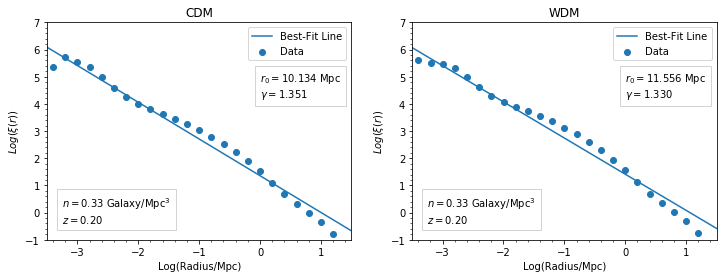

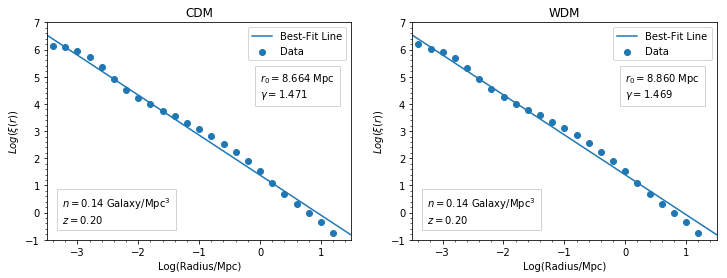

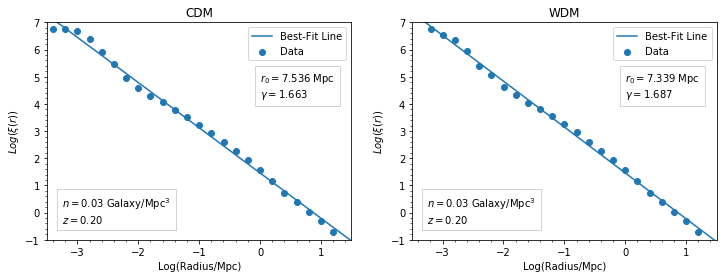

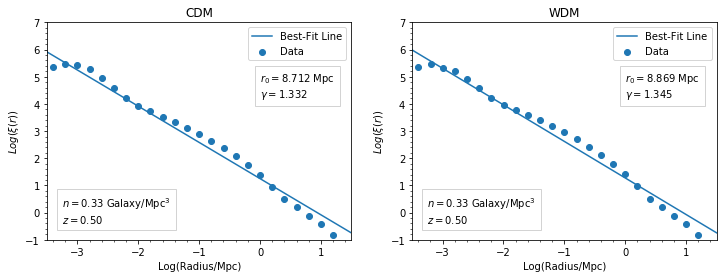

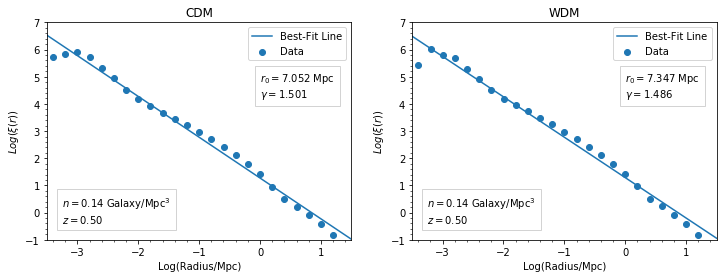

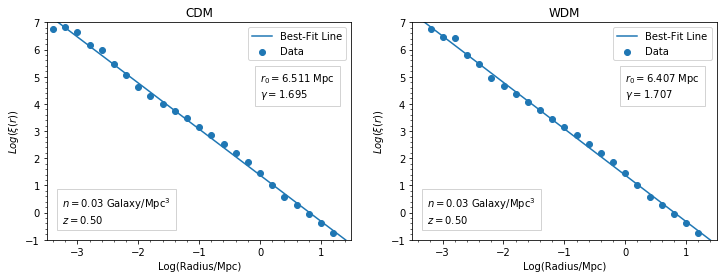

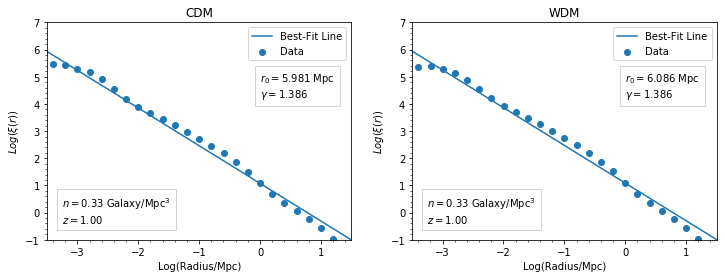

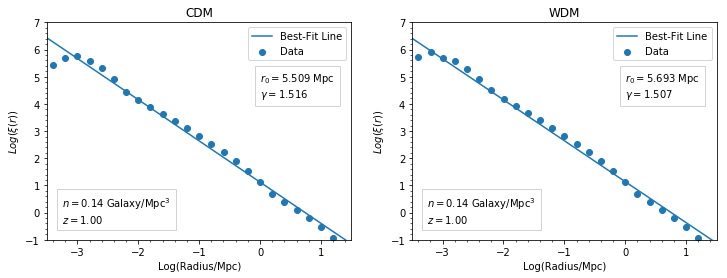

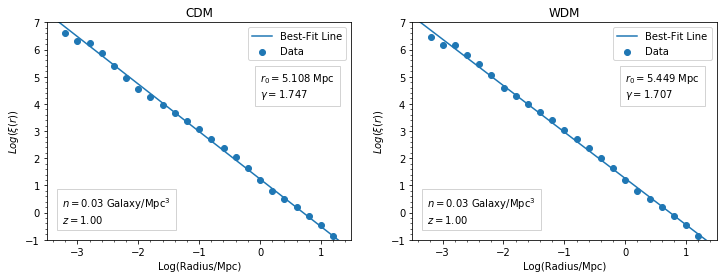

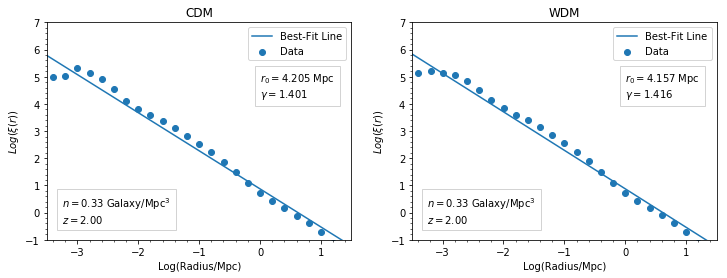

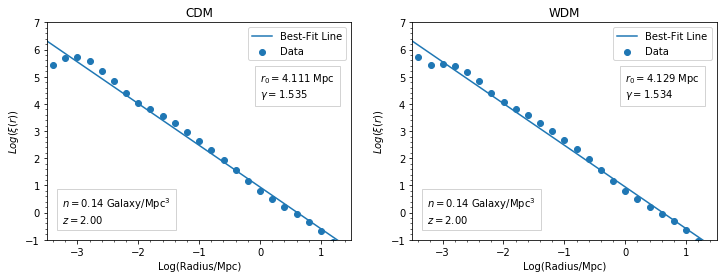

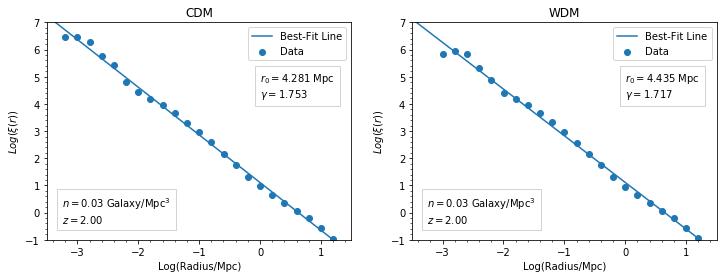

In [7]:
# loop over the redshifts
for z in [0.2,0.5,1.00,2.00]:
    
    z="{:.2f}".format(z)

    # loop over the galaxy number densities
    for n in [326952,136834,30000]:
        
        n='{:.2f}'.format(n/(100**3))
              
        # set up the plots
        plt.figure(figsize=(12,4))
        grid = gridspec.GridSpec(1,2)
        grid.update(hspace = 0)
        grid0 = plt.subplot(grid[0])
        grid1 = plt.subplot(grid[1])
        
        # loop over cdm and wdm
        for label,grid in zip(['cdm','wdm'],[grid0,grid1]):
            
            # load data
            root="Output/redshift/corr_"
            CUTE_sorted = np.genfromtxt(root+label+"_galaxy_position_z"+z+"_n"+n+".txt")

            # calculate the best fit correlation length and slope
            xdata, ydata = np.logspace(-3.5,1.5), np.log10(CUTE_sorted[:,1])
            params = curve_fit(log_xi, CUTE_sorted[:,0][ydata!=-np.inf], ydata[ydata!=-np.inf])
            
            # label the plots
            textstr1 = '\n'.join((
                r'$n=$'+n+' Galaxy/Mpc$^{3}$',
                r'$z=$'+z))
            textstr2 = '\n'.join((
                r'$r_0=${:.3f} Mpc'.format(params[0][0]),
                r'$\gamma=${:<.3f}'.format(params[0][1])))
            props = dict(facecolor='none', edgecolor='lightgrey', pad = 5.0)
        
            # plot the best fit correlation length and slope
            grid.scatter(np.log10(CUTE_sorted[:,0]), ydata, label = "Data")
            grid.plot(np.log10(xdata),log_xi(xdata,params[0][0],params[0][1]), label = 'Best-Fit Line')             
            grid.text(-3.25, 0.7, textstr1, verticalalignment='top', bbox=props) #-3.25, 0.7 #-0.45, 5.1
            grid.text(0, 5.2, textstr2, verticalalignment='top', bbox=props) #-3.25, 2.5 #-3.25, 0.7
            grid.set_xlabel('Log(Radius/Mpc)')
            grid.set_ylabel(r"$Log(\xi(r))$")
            grid.set_title(label.upper())
            grid.set_xlim(-3.5,1.5)
            grid.set_ylim(-1,7)
            grid.minorticks_on()
            grid.legend()
        
        plt.show()

# Calculate the percentage of satellite galaxies
### Repeat for each model

In [8]:
print('Calculating the percentage of satellites...\n')

for z in [0.2,0.5,1.00,2.00]:
    
    # repeat for all redshifts
    z="{:.2f}".format(z)
    
    # iterate through each galaxy number density
    for n in [326952,136834,30000]:
        
        # loop over cdm and wdm
        for label,tag in zip(['CDM','WDM'],['z='+z,'n={:.2f}'.format(n/(100**3))+' Galaxy/Mpc^3']):
    
            galaxy = h5py.File('Data/n/home07/sbose/COLOR_'+label+'_Galaxies_z'+z+'.hdf5', 'r')

            # access galaxy mass
            galaxy_mass = galaxy['StellarMass'][:]

            # sort in order of descending mass
            ind = sorted(range(len(galaxy_mass)), key=lambda k: galaxy_mass[k], reverse = True)

            # calculate the number of satellite galaxies
            iscentral=galaxy['IsCentral'][:][ind[:n]]
            
            print('{:<23}'.format(tag)+label+': {:.3f}'.format(len(iscentral[iscentral==0])*100/n))
            
        print()

Calculating the percentage of satellites...

z=0.20                 CDM: 49.442
n=0.33 Galaxy/Mpc^3    WDM: 53.032

z=0.20                 CDM: 44.893
n=0.14 Galaxy/Mpc^3    WDM: 45.607

z=0.20                 CDM: 38.280
n=0.03 Galaxy/Mpc^3    WDM: 38.120

z=0.50                 CDM: 45.804
n=0.33 Galaxy/Mpc^3    WDM: 47.943

z=0.50                 CDM: 42.249
n=0.14 Galaxy/Mpc^3    WDM: 42.901

z=0.50                 CDM: 35.770
n=0.03 Galaxy/Mpc^3    WDM: 35.520

z=1.00                 CDM: 40.845
n=0.33 Galaxy/Mpc^3    WDM: 41.851

z=1.00                 CDM: 37.493
n=0.14 Galaxy/Mpc^3    WDM: 37.974

z=1.00                 CDM: 31.560
n=0.03 Galaxy/Mpc^3    WDM: 31.263

z=2.00                 CDM: 32.793
n=0.33 Galaxy/Mpc^3    WDM: 33.490

z=2.00                 CDM: 29.439
n=0.14 Galaxy/Mpc^3    WDM: 29.680

z=2.00                 CDM: 24.483
n=0.03 Galaxy/Mpc^3    WDM: 24.107



### Including red and blue galaxies

In [9]:
print('Calculating the percentage of satellites in red and blue galaxies...')
print('\n{:<23}'.format(' ')+'{:<15}'.format('Blue')+'Red\n')

for z in [0.2,0.5,1.00,2.00]:
    
    # repeat for all redshifts
    z="{:.2f}".format(z)
    
    # iterate through each galaxy number density
    for n in [136834,30000]:
        
        for label,tag in zip(['CDM','WDM'],['z='+z,'n={:.2f}'.format(n/(100**3))+' Galaxy/Mpc^3']):
    
            galaxy = h5py.File('Data/n/home07/sbose/COLOR_'+label+'_Galaxies_z'+z+'.hdf5', 'r')

            # access galaxy color/mass/iscentral
            galaxy_color = galaxy['Colour'][:]
            galaxy_mass = galaxy['StellarMass'][:]
            galaxy_iscentral = galaxy['IsCentral'][:]

            # define the red and blue galaxies
            blue = np.array(galaxy_color)[np.where(galaxy_color < 0.5)]
            red = np.array(galaxy_color)[np.where(galaxy_color > 0.5)]

            # sort the galaxies in order of descending mass
            blue_ind = sorted(range(len(blue)), key=lambda k: galaxy_mass[k], reverse = True)
            red_ind = sorted(range(len(red)), key=lambda k: galaxy_mass[k], reverse = True)
            
            # determine the satellite blue and red galaxies 
            iscentral_blue = galaxy_iscentral[blue_ind[:n]]
            iscentral_red = galaxy_iscentral[red_ind[:n]]
            
            # calculate the percentage of satellite galaxies
            frac_blue = len(iscentral_blue[iscentral_blue == 0])*100/n
            frac_red = len(iscentral_red[iscentral_red == 0])*100/n

            print('{:<23}'.format(tag)+label+': {:<10.3f}'.format(frac_blue)+label+': {:.3f}'.format(frac_red))
    
        print()

Calculating the percentage of satellites in red and blue galaxies...

                       Blue           Red

z=0.20                 CDM: 75.178    CDM: 45.775
n=0.14 Galaxy/Mpc^3    WDM: 68.743    WDM: 44.952

z=0.20                 CDM: 50.810    CDM: 39.480
n=0.03 Galaxy/Mpc^3    WDM: 41.177    WDM: 37.523

z=0.50                 CDM: 72.017    CDM: 42.305
n=0.14 Galaxy/Mpc^3    WDM: 58.673    WDM: 42.057

z=0.50                 CDM: 46.873    CDM: 35.937
n=0.03 Galaxy/Mpc^3    WDM: 37.753    WDM: 34.753

z=1.00                 CDM: 45.810    CDM: 38.557
n=0.14 Galaxy/Mpc^3    WDM: 38.824    WDM: 39.184

z=1.00                 CDM: 35.320    CDM: 32.883
n=0.03 Galaxy/Mpc^3    WDM: 32.277    WDM: 32.600

z=2.00                 CDM: 29.439    CDM: 0.154
n=0.14 Galaxy/Mpc^3    WDM: 29.680    WDM: 0.276

z=2.00                 CDM: 24.483    CDM: 0.703
n=0.03 Galaxy/Mpc^3    WDM: 24.107    WDM: 1.257

